In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

df = pd.read_csv("superstore_final_dataset.csv", encoding='ISO-8859-1')


df.head()



,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
print(df.columns)


df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

df.dropna(subset=['Order_Date', 'Sales'], inplace=True)


df['Month_Year'] = df['Order_Date'].dt.to_period('M')
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Month_Year', 'Month', 'Year'],
      dtype='object')


In [ ]:
# Fix 'Sales' column if needed (already done)
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

# Print key performance indicators using corrected column names
print("📈 Total Sales: $", round(df['Sales'].sum(), 2))
print("📦 Total Orders:", df['Order_ID'].nunique())       # Adjusted
print("🧍‍♂️ Unique Customers:", df['Customer_ID'].nunique())  # Adjusted


📈 Total Sales: $ 872363.12
📦 Total Orders: 1975
🧍‍♂️ Unique Customers: 736


In [ ]:
# 1. Sales by Category
print("Sales by Category:")
print(df.groupby('Category')['Sales'].sum())

# 2. Sales by Sub-Category
print("\nTop 5 Sub-Categories by Sales:")
print(df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).head())

# 3. Sales by Region
print("\nSales by Region:")
print(df.groupby('Region')['Sales'].sum())

# 4. Sales by Segment
print("\nSales by Segment:")
print(df.groupby('Segment')['Sales'].sum())

# 5. Top 10 Cities by Sales
print("\nTop 10 Cities by Sales:")
print(df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10))


Sales by Category:
Category
Furniture          285562.8726
Office Supplies    252956.1610
Technology         333844.0900
Name: Sales, dtype: float64

Top 5 Sub-Categories by Sales:
Sub_Category
Phones      124533.0920
Chairs      122626.9450
Tables       88768.3035
Storage      84433.2060
Machines     83658.1960
Name: Sales, dtype: float64

Sales by Region:
Region
Central    208805.0696
East       246227.6310
South      146173.7895
West       271156.6335
Name: Sales, dtype: float64

Sales by Segment:
Segment
Consumer       431199.9950
Corporate      263710.1641
Home Office    177452.9645
Name: Sales, dtype: float64

Top 10 Cities by Sales:
City
New York City    101118.8400
Los Angeles       70835.2220
Seattle           39610.4540
San Francisco     38223.1700
Philadelphia      34950.8690
Houston           26318.7192
Lafayette         19389.2600
San Diego         18954.2900
Chicago           15322.7910
Burlington        14832.2760
Name: Sales, dtype: float64


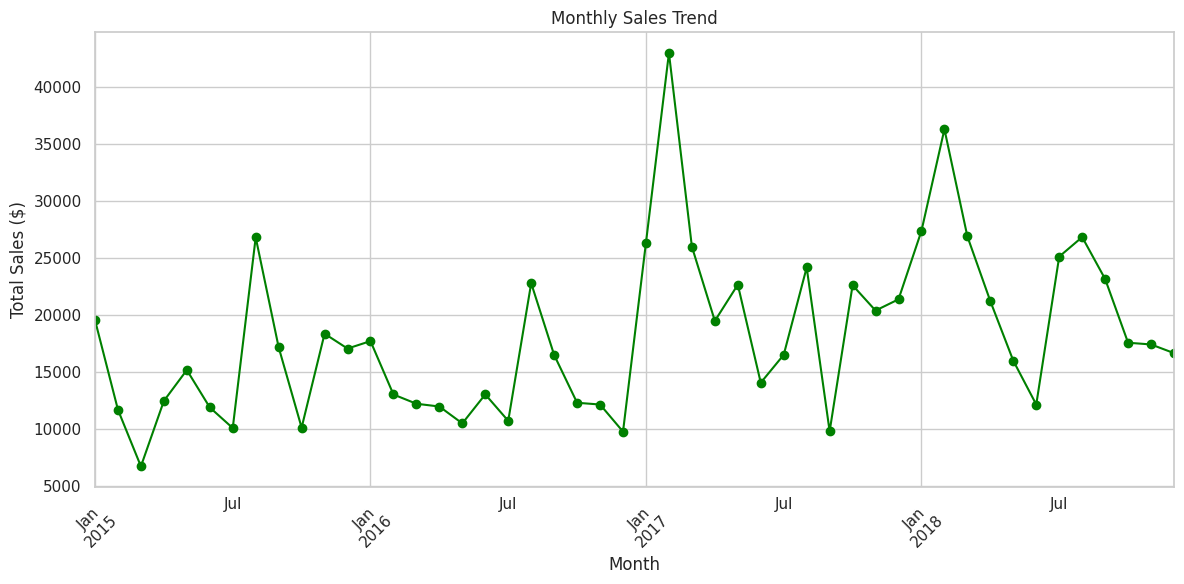

In [ ]:
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



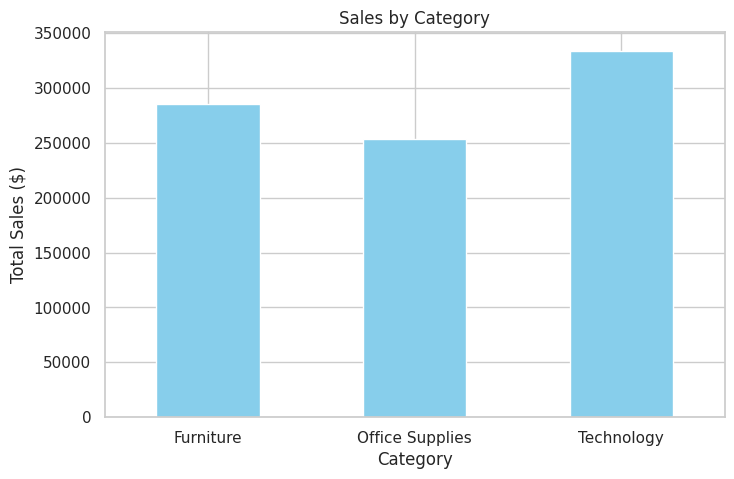

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Sales by Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.show()



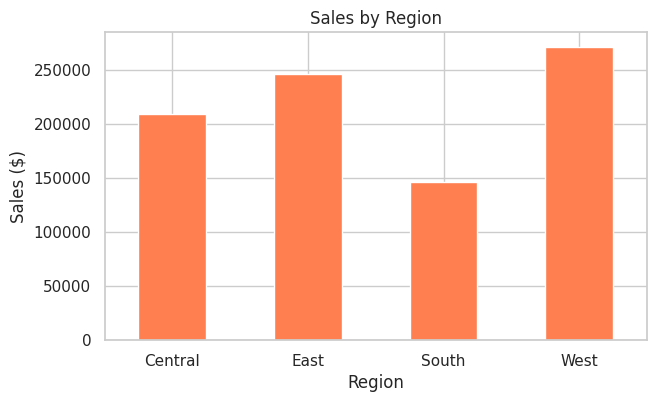

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.plot(kind='bar', color='coral', figsize=(7,4))
plt.title("Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.show()



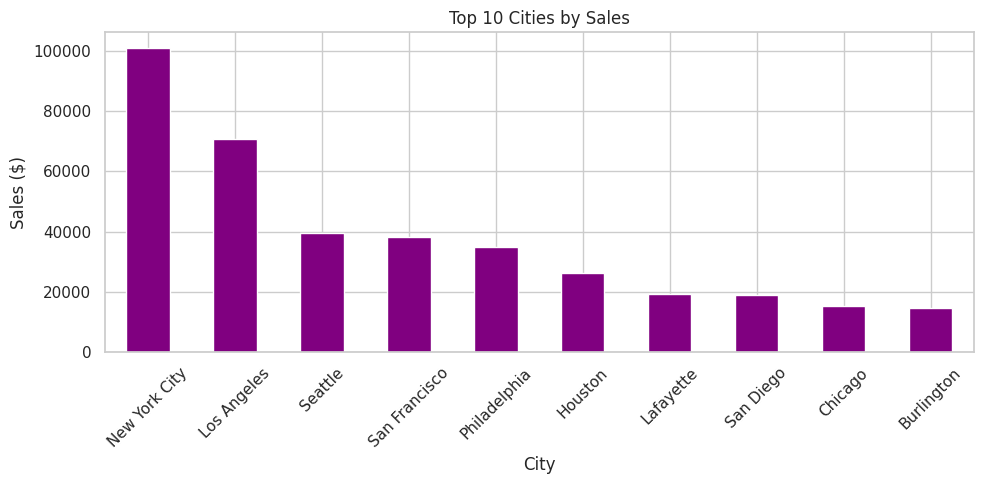

In [ ]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', color='purple', figsize=(10,5))
plt.title("Top 10 Cities by Sales")
plt.ylabel("Sales ($)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



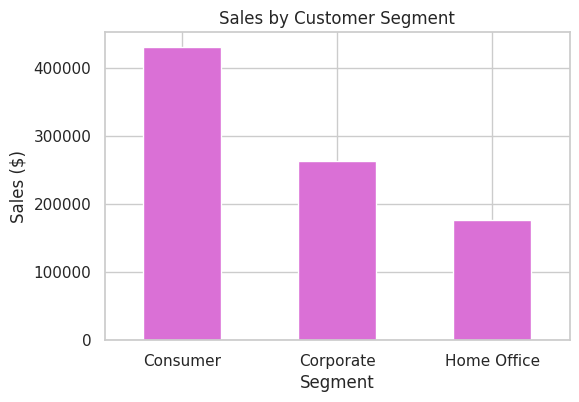

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum()

segment_sales.plot(kind='bar', color='orchid', figsize=(6,4))
plt.title("Sales by Customer Segment")
plt.ylabel("Sales ($)")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.show()


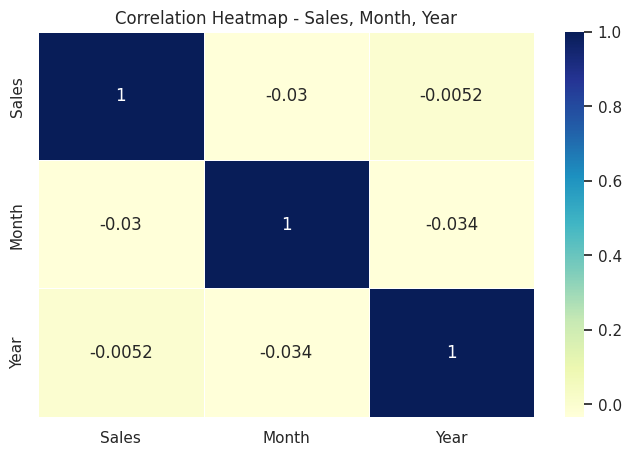

In [ ]:


# Select relevant numeric columns
corr_df = df[['Sales', 'Month', 'Year']]

# Plot the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap - Sales, Month, Year")
plt.show()


In [ ]:
df.to_csv("cleaned_superstore_data.csv", index=False)

from google.colab import files
files.download("cleaned_superstore_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🧾 Task 2: Sales Performance Analysis  
**Internship:** Alfido Tech – Data Analyst  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Google Colab  
**Dataset:** superstore_final_dataset.csv  

---

## 🎯 Objective  
To analyze sales performance across various business dimensions — including product category, region, customer segment, and time — and to derive actionable insights that support strategic decision-making.

---

## 📁 Step 1: Import Required Libraries  
Libraries used:  
- `Pandas` for data manipulation  
- `Matplotlib` & `Seaborn` for visualization  

---

## 📥 Step 2: Load and Preview Dataset  
- Loaded dataset using `pd.read_csv()`  
- Previewed rows to understand structure  

---

## 🧹 Step 3: Data Cleaning & Preprocessing  
- Converted `Order_Date` and `Ship_Date` into datetime format  
- Dropped rows with missing `Order_Date` or `Sales`  
- Created new columns:
  - `Month_Year` (e.g., 2022-04)
  - `Month` (1–12)
  - `Year` (e.g., 2022)

---

## 📊 Step 4: KPI Overview  

| Metric             | Value        |
|--------------------|--------------|
| 💰 Total Sales      | \$872,363.12 |
| 📦 Total Orders     | 1,975        |
| 🧍 Unique Customers | 736          |

---

## 🔍 Step 5: Exploratory Data Analysis (EDA)  
- 📦 **Sales by Category** – Technology and Office Supplies lead  
- 📍 **Sales by Region** – West & East regions perform best  
- 🏙️ **Top Cities** – New York and Los Angeles top sales  
- 👤 **Sales by Segment** – Consumer and Corporate dominate  
- 📈 **Monthly trend** – Peak in Q4

---

## 📈 Step 6: Visualizations  

### 📅 1. Monthly Sales Trend  
Line plot showing monthly sales using `Month_Year`

### 📦 2. Sales by Category  
Bar chart of total sales grouped by product category

### 🌍 3. Sales by Region  
Bar chart comparing regional sales performance

### 🏙️ 4. Top 10 Cities by Sales  
Bar chart showing cities with highest sales

### 👤 5. Sales by Customer Segment  
Bar chart comparing Consumer, Corporate, Home Office

### 🔥 6. Correlation Heatmap  
Heatmap of numeric columns like Sales, Month, Year

---

## ✅ Step 7: Insights & Recommendations  

### 🔍 Key Insights  
- 📈 Sales peak in **November and December**  
- 🏆 **Technology** & **Office Supplies** drive major revenue  
- 🏙️ Cities like **New York** and **Los Angeles** are top contributors  
- 🌍 **West** and **East** regions outperform others  
- 👤 **Consumer** and **Corporate** segments dominate  

---

### 💡 Recommendations
- Expand inventory in **high-performing categories**  
- Improve logistics in lower-performing regions  
- Introduce loyalty rewards for **Consumer/Corporate** clients  
- Use city-wise data to refine marketing strategies  

---
### 📌 Conclusion
This sales analysis helps identify strong and weak areas in business performance, enabling targeted improvements. Visual trends and data-backed recommendations can support strategic planning and drive revenue growth.

---


